In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
mag_je = pd.read_csv('./blackpink/mag_je.csv', sep='|', encoding = 'utf-8')

In [118]:
mag_je[mag_je['magazine']=='E']

,magazine,brand,category,title,link,date,contents,title_brand,word_jenny,ADFN
82,E,Je,FASHION,김나영부터 지수까지! 진주 주얼리를 한 스타들,http://v.media.daum.net/v/20201126070033106,2020.11.26,"[[], ['', '쇄골 라인에 걸리는 진주 목걸이의 클래식한 매력을 캐치한 제니....",0,쇄골 라인에 걸리는 진주 목걸이의 클래식한 매력을 캐치한 제니. 화이트 셔츠와 블랙...,"[쇄골, 라인, 진주, 목걸이, 클래식, 매력, 캐치, 제니, 화이트, 셔츠, 블랙..."
83,E,Je,FASHION,공효진부터 제니까지! 스타들의 #니트 활용법,http://v.media.daum.net/v/20201123070034440,2020.11.23,"[['「 #케이블 니트 」', '「 #케이블 니트 」', '', '', '', '입...",1,"#케이블 니트 , #케이블 니트 , , , , 입체적인 꼬임 패턴이 매력적인 케...","[니트, 니트, 입체, 꼬임, 패턴, 매력, 케이블, 니트, 클래식, 클래식, 유행..."
84,E,Je,FASHION,'핑크색 입으면 기분이 조크든요' 핑크 홀릭,http://v.media.daum.net/v/20201117115642590,2020.11.17,"[['', '', '', '', '', '', '', '', '', '', '', ...",0,제니는 핑크와 화이트 스트라이프 패턴의 카디건과 쇼츠를 입었어요. 핑크와 화이트로 ...,"[제니, 핑크, 화이트, 스트라이프, 패턴, 카디건, 쇼츠, 핑크, 화이트, 소녀,..."
85,E,Je,STAR,제니부터 조이까지! 스타들이 선택한 #리본헤어스타일,http://v.media.daum.net/v/20201112070037606,2020.11.12,"[['「 포니테일 스타일에 생기있게 」', '「 포니테일 스타일에 생기있게 」', ...",1,"포니테일 스타일에 생기있게 , 포니테일 스타일에 생기있게 , , , , , , ...","[포니테일, 스타일, 포니테일, 스타일, 포니테일, 헤어스타일, 리본, 헤어, 액세..."
86,E,Je,FASHION,"저장각! 겨울 필수템 머플러, 스타들의 연출법과 추천템 리스트",http://v.media.daum.net/v/20201111070112614,2020.11.11,"[['「 #1 장희령 」', '「 #1 장희령 」', '환한 미소만큼이나 상큼상큼!...",0,"#4 제니 , #4 제니 , 머플러 컬러를 선택할 때 옷 말고 액세서리와의 궁합...","[제니, 제니, 머플러, 컬러, 선택, 옷, 액세서리, 궁합, 고려, 좋은, 방법,..."
...,...,...,...,...,...,...,...,...,...,...
159,E,Je,STAR,활짝 핀 블랙핑크,http://v.media.daum.net/v/20180404142840507,2018.04.04,"[[], ['아름답고 강렬하며 눈부신 존재, 블랙핑크', '', '어깨를 강조한 플...",0,<엘르> 뮤즈가 되어 꽃과 함께 촬영했어요. 누군가에게 꽃 선물을 한다면 지수 가장...,"[엘르, 뮤즈, 꽃, 촬영, 누군가, 꽃, 선물, 좋아하는, 은방울꽃, 선물, 제니..."
160,E,Je,BEAUTY,봄에 피어난 제니,http://v.media.daum.net/v/20180223153650299,2018.02.23,"[[], ['독보적인 카리스마에 우아함을 머금은 눈빛, 사랑스러운 웃음까지 고루 갖...",1,", 독보적인 카리스마에 우아함을 머금은 눈빛, 사랑스러운 웃음까지 고루 갖춘 팔색조...","[독보, 카리스마, 우아함을, 머, 금은, 눈빛, 사랑스러운, 웃음, 고루, 팔색조..."
161,E,Je,STAR,엘르 최초 K팝 그룹 단체 커버의 주인공 블랙핑크,http://v.media.daum.net/v/20170807150938837,2017.08.07,"[[], ['블랙핑크가 쓰는 걸 그룹의 새로운 역사는 이미 시작됐다', '', '지...",0,"지수가 입은 파워 숄더 톱과 페이턴트 스커트, 리사가 입은 원 숄더 벨벳 드레스와 ...","[파워, 숄더, 톱, 페이, 턴트, 스커트, 원, 숄더, 벨벳, 드레스, 하이, 부..."
162,E,Je,STAR,제니의 패션 놀이터,http://v.media.daum.net/v/20170803175149088,2017.08.03,"[[], ['런웨이 위를 걸었던 ‘어려운 옷’도 척척 소화해내는 블랙핑크 제니. 사...",1,", 런웨이 위를 걸었던 어려운 옷’도 척척 소화해내는 BLACKPINK 제니. 사랑...","[런웨이, 어려운, 옷, 도, 척척, 소화, 제니, 사랑스러운, 외모, 뛰어난, 패..."


# 전처리

## 기호삭제

In [5]:
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

In [6]:
mag_je['word_jenny'][164]

', ,  , 블랙핑크 제니가 요정 같은 매혹적인 화보를 선보였다., 제니는 패션 매거진과 함께 한 샤넬 커버 화보에서 샤넬(CHANEL) 화인 주얼리의 코코 크러쉬 주얼리와 새로운 샤넬 크루즈 컬렉션 의상을 소화하며 성숙하면서도 아름다운 여인으로 완벽 변신했다., 화보 속 제니는 카페에 앉아 백일몽을 꾸는 듯한 모습과 몽환적인 눈빛으로 색다른 헤어와 메이크업 스타일로 팬들을 사로잡았다., 제니는 무대에 섰을 때 관객이 들려주는 함성과 그 에너지가 늘 큰 힘이 된다. 지금처럼 사는 모습을 어렸을 때 막연하게 꿈꾸긴 했지만, 그 꿈을 하나씩 이뤄가고 있는 이 현실이 아직도 기적처럼 느껴진다라고 최근 심정을 밝혔다., , , , , , , , 패션엔 김금희 기자nfashionn@fashionn.com, '

## 디자이너명 브랜드명 replace

### 블랙핑크 BLACKPINK

In [7]:
for word in mag_je['word_jenny']:
    if '파샤' in word:
        print(word)
        print('-'*50)

In [8]:
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('블랙핑크', 'BLACKPINK')

### 샤넬

In [9]:
for word in mag_je['word_jenny']:
    if '로랑' in word:
        print(word)
        print('-'*50)

샤넬, 구찌, 생 로랑, 발렌시아가 등 수많은 패션 하우스들의 사랑을 받고 있는 BLACKPINK 제니가 개인 인스타그램 계정을 오픈하고 데일리 룩을 업로드 중이다.,  화려한 그녀의 사복 패션은 어떨까?, JENNIE dress 몸매가 드러나는 미니 드레스를 착용한 제니. 단조로운 디자인 보다는 군더더기 없는 실루엣에 트위드 소재나 패턴이 있는 미니 드레스로 사랑스럽게 연출했다., LOVELY girl 포카리 걸이 생각나는 시폰 소재의 여성스러운 드레스나 오프 숄더로 청순한 매력까지 더한 제니.,  긴 생머리와 레이스, 러플 디테일이 더해진 아이템과 크리스털 장식 주얼리까지 더하면 여성스러운 제니 변신 완료!, CHECK lover 제니가 클래식한 체크 패턴 룩을 입는 방법?, 캐주얼한 톱과 디스트로이드 진에 체크 패턴 재킷을 착용해 드레스 업 하거나 튜브 톱 드레스로 클래식하면서도 여성스럽게 착용하는 것., 여기에 제니처럼 길이가 다른 네크리스를 레이어드 하는 센스를 발휘해 볼 것!, ACT cool! 스포티한 룩도 본인만의 스타일로 연출하는 제니!, 슬릿 디테일의 트레이닝 팬츠로 섹시함을 더하거나 짧은 쇼트에 삭스와 스니커즈로 귀엽게 연출해도 좋겠다.
--------------------------------------------------
감상 포인트 언뜻 단순한 듯한 비트 속에서 인도 전통악기 시타르가 깔리고 랩, 멜로디, 특히 하우 유 라이크댓’이란 외침이 반복적으로 들리다 뚝 끊긴다. 〈빌보드〉는 후크가 너무나 즉각적이어서 매력에 빠지지 않을 수 없다.고 평론. 팔색조 같은 멤버 한 명, 한 명의 치명적 유혹 속에 허우적거리다 보면 어느덧 하우 유 라이크 댓?을 흥얼거리게 되고 절대 잊혀지지 않는다. 패션 면에선 이제 인간 OO’가 아닌 디자이너 브랜드가 따라오는 스타일 아이콘이 됐다. 제니는 샤넬, 지수는 디올 뷰티, 리사는 셀린느, 로제는 생로랑의 앰배서더. 미국 NBC 〈지미 팰런 쇼〉에서는 한복에서 영감을 얻은 의상을 입어 K-스타일’ 전파

In [10]:
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('샤넬', 'CHANEL')

### 디올

In [11]:
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('디올', 'DIOR')

### 셀린느

In [12]:
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('셀린느', 'CELINE')

In [13]:
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('셀린', 'CELINE')

### 생로랑

In [14]:
# 생로랑
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('생 로랑', 'SAINTLAURENT')
mag_je['word_jenny'] = mag_je['word_jenny'].str.replace('생로랑', 'SAINTLAURENT')

## list(article_list) 생성 후 append

In [15]:
contents_list = []

In [16]:

article_list = []
for word in mag_je['word_jenny']:
    article_list.append(word)

In [17]:
len(article_list)

297

In [18]:
article_list[6]

'jennierubyjanen제니n컬러도, 패턴도 따뜻해 보이는 크롭트 카디건이 이토록 시원해 보이는 이유는 제니의 과감한 애티튜드에 있다. 속옷이 보일 정도로 짧은 톱은 레이어드하는 것이 일반적인데, 제니는 과감하게 이너를 생략하고 데님 팬츠에 톱으로 매치해 캐주얼한 감성과 관능적인 무드가 공존하는 룩을 완성했다. 노출이 과해 보이지 않게 심플한 네크리스로 빈 공간을 채워준 센스도 눈여겨볼 것.'

## 트위터 패키지 안에 konlpy 모듈 호출

In [19]:
from konlpy.tag import Twitter

In [20]:
twitter = Twitter()

C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [21]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


297


In [22]:
sentences_tag[0]

[('싹', 'Noun'),
 ('쓰리의', 'Adjective'),
 ('린다', 'Noun'),
 ('G', 'Alpha'),
 (',', 'Punctuation'),
 ('BLACKPINK', 'Alpha'),
 ('제니', 'Noun'),
 (',', 'Punctuation'),
 ('청', 'Noun'),
 ('하', 'Suffix'),
 ('그', 'Noun'),
 ('외', 'Noun'),
 ('등등', 'Noun'),
 ('많은', 'Adjective'),
 ('셀럽', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('공통', 'Noun'),
 ('적', 'Suffix'),
 ('으로', 'Josa'),
 ('보여준', 'Verb'),
 ('하나', 'Noun'),
 ('의', 'Josa'),
 ('메이크업', 'Noun'),
 ('룩', 'Noun'),
 ('이', 'Josa'),
 ('있다', 'Adjective'),
 ('?', 'Punctuation'),
 ('스타', 'Noun'),
 ('뷰터뷰', 'Noun'),
 ('를', 'Josa'),
 ('진행', 'Noun'),
 ('하며', 'Verb'),
 ('셀럽', 'Noun'),
 ('담당', 'Noun'),
 ('아티스트', 'Noun'),
 ('에게', 'Josa'),
 ('직접', 'Noun'),
 ('들은', 'Verb'),
 ('눈', 'Noun'),
 ('앞머리', 'Noun'),
 ('하이라이트', 'Noun'),
 ('’', 'Punctuation'),
 ('에', 'Josa'),
 ('대한', 'Noun'),
 ('모든', 'Noun'),
 ('것', 'Noun'),
 ('.', 'Punctuation'),
 ('무슨', 'Noun'),
 ('효과', 'Noun'),
 ('가', 'Josa'),
 ('있는', 'Adjective'),
 ('거', 'Noun'),
 ('죠', 'Josa'),
 ('?', 'Punctuation'),
 (

In [23]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stopword 추가

In [91]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [92]:
sw_df.columns = ['stopword']

In [93]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [94]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [95]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [96]:
add_0 = ['수', '있는', '더', 'n', '위', '듯', '있어요', '중', '게', '같아요', '요', '거', '속', '건', '드', '같은',
        '대', '전', '연출', '통해', '가장', '사람', '한편', '지금', '두', '↑', '부분', '날', '호', '최근', '더욱', '데', '역시', 
         '해', '때문', '업는', '요즘', '후', '많은', '대한', '앞', '내', '볼', '순간', '입니다', '최수영', '이제', '지난', 
         '뒤', '준', '번', '사진']
for w in add_0:
    stop_words.append(w)

In [97]:
add_1 = ['BLACKPINK', '리사', '지수', '로제', '기자']
for w in add_1:
    stop_words.append(w)

In [98]:
len(stop_words)

732

### 1. 명사 혹은 형용사인 품사만 선별해 리스트에 담기

In [99]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign']:
            if not word in stop_words:
                noun_adj_list.append(word)

In [100]:
len(noun_adj_list)

23156

In [101]:
noun_adj_list[:20]

['싹',
 '쓰리의',
 '린다',
 'G',
 '제니',
 '청',
 '외',
 '셀럽',
 '공통',
 '메이크업',
 '룩',
 '스타',
 '뷰터뷰',
 '진행',
 '셀럽',
 '담당',
 '아티스트',
 '직접',
 '눈',
 '앞머리']

In [102]:
noun_adj_list[:10]

['싹', '쓰리의', '린다', 'G', '제니', '청', '외', '셀럽', '공통', '메이크업']

In [103]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [104]:
len(ADFN_list)

297

In [124]:
ADFN_list[80]

['제니',
 '투톤헤어',
 '단시간',
 '기분',
 '전환',
 '염색',
 '투톤',
 '헤어',
 '추천',
 '헤어',
 '탑',
 '코트',
 '헤어',
 '초크',
 '활용',
 '셀',
 '프로도',
 '있고',
 '얼룩덜룩함',
 '나름',
 '매력',
 '있기',
 '머리카락',
 '끝',
 '색',
 '달리',
 '투톤헤어',
 '자연스러운',
 '스타일',
 '제니',
 '브릿지',
 '염색',
 '시도',
 '방법',
 '출처',
 '헤어',
 '컬러',
 '피부색',
 '달라',
 '기분',
 '전환',
 '일등',
 '공신',
 '헤어',
 '염색',
 '컬러',
 '대세']

In [106]:
mag_je['ADFN'] = ADFN_list

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [107]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 748), ('스타일', 197), ('패션', 192), ('컬러', 187), ('CHANEL', 167), ('룩', 151), ('헤어', 145), ('스타', 132), ('블랙', 113), ('매치', 112), ('포인트', 104), ('모습', 97), ('일링', 84), ('브랜드', 77), ('완성', 76), ('앞머리', 75), ('팬츠', 75), ('매력', 73), ('그녀', 73), ('메이크업', 71), ('아이템', 69), ('화이트', 69), ('입술', 68), ('분위기', 67), ('재킷', 66), ('걸', 64), ('톱', 61), ('머리', 61), ('패턴', 60), ('착용', 59), ('생각', 58), ('말', 58), ('레드', 57), ('화보', 56), ('선택', 55), ('제품', 55), ('얼굴', 54), ('공개', 54), ('눈', 53), ('니트', 53), ('데님', 50), ('카디건', 50), ('멤버', 50), ('핑크', 48), ('선글라스', 48), ('무드', 48), ('무대', 48), ('백', 47), ('공항', 47), ('밴드', 46), ('디자인', 46), ('느낌', 44), ('장식', 44), ('라인', 44), ('컬렉션', 43), ('드레스', 41), ('시작', 40), ('액세서리', 40), ('미니', 40), ('그룹', 40), ('팬', 39), ('트', 38), ('소화', 38), ('립', 38), ('활용', 37), ('티셔츠', 37), ('앨범', 37), ('첫', 37), ('시크', 36), ('티', 36), ('참석', 36), ('투어', 36), ('위드', 35), ('감', 34), ('촬영', 34), ('모델', 34), ('강조', 33), ('원피스', 33), ('크롭트', 33), ('리본', 33), ('블리치', 33), ('영

In [108]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [109]:
count = Counter(noun_adj_list)

In [110]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('제니', 748)
('스타일', 197)
('패션', 192)
('컬러', 187)
('CHANEL', 167)
('룩', 151)
('헤어', 145)
('스타', 132)
('블랙', 113)
('매치', 112)
('포인트', 104)
('모습', 97)
('일링', 84)
('브랜드', 77)
('완성', 76)
('앞머리', 75)
('팬츠', 75)
('매력', 73)
('그녀', 73)
('메이크업', 71)
('아이템', 69)
('화이트', 69)
('입술', 68)
('분위기', 67)
('재킷', 66)
('걸', 64)
('톱', 61)
('머리', 61)
('패턴', 60)
('착용', 59)
('생각', 58)
('말', 58)
('레드', 57)
('화보', 56)
('선택', 55)
('제품', 55)
('얼굴', 54)
('공개', 54)
('눈', 53)
('니트', 53)
('데님', 50)
('카디건', 50)
('멤버', 50)
('핑크', 48)
('선글라스', 48)
('무드', 48)
('무대', 48)
('백', 47)
('공항', 47)
('밴드', 46)
('디자인', 46)
('느낌', 44)
('장식', 44)
('라인', 44)
('컬렉션', 43)
('드레스', 41)
('시작', 40)
('액세서리', 40)
('미니', 40)
('그룹', 40)
('팬', 39)
('트', 38)
('소화', 38)
('립', 38)
('활용', 37)
('티셔츠', 37)
('앨범', 37)
('첫', 37)
('시크', 36)
('티', 36)
('참석', 36)
('투어', 36)
('위드', 35)
('감', 34)
('촬영', 34)
('모델', 34)
('강조', 33)
('원피스', 33)
('크롭트', 33)
('리본', 33)
('블리치', 33)
('영상', 32)
('여성', 32)
('없는', 32)
('톤', 32)
('마무리', 32)
('체크', 31)
('클래식', 31)
('가방', 

## 워드클라우드 만들기

In [111]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [112]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [113]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [114]:
from wordcloud import WordCloud

In [115]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

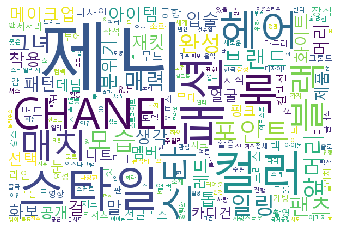

In [116]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('jenny_adj_twitter.png')

In [117]:
mag_je.to_csv('./magazine/final/mag_je_adfn.csv', sep ='|', encoding = 'utf-8', index = False)

In [248]:
mag_JECH = mag_je[['magazine', 'brand', 'title', 'link', 'date', 'word_jenny', 'ADFN']]

In [249]:
mag_JECH.to_csv('./magazine/final/mag_JECH.csv', sep = '|', encoding = 'utf-8', index = False)

In [46]:
jennytop200 = pd.DataFrame(word_list)

In [48]:
jennytop200.columns = ['word', 'count']

In [49]:
jennytop200

,word,count
0,제니,748
1,BLACKPINK,327
2,스타일,197
3,패션,192
4,컬러,187
...,...,...
195,지난,22
196,국제공항,22
197,뒤,21
198,준,21


In [51]:
jennytop200.to_csv('./magazine/final/jennytop200.csv', sep='|', encoding = 'utf-8', index = False)